# 🔍 Deepfake Detection Project - Stage 1
## Image Classification for Fake and Real Image Detection

---

### 📖 Project Overview
This project aims to detect fake (deepfake) and real images using deep learning methods. It utilizes modern CNN architectures such as EfficientNetB7, MobileNetV3Large, VGG16, and Xception to achieve high-accuracy classification.

### 🎯 Project Objectives
- **Data Preprocessing**: Cleaning and standardizing image data
- **Model Development**: Creating effective CNN models with transfer learning
- **Performance Analysis**: Evaluating and optimizing model performance

### 📊 Dataset Information
- **Classes**: Real and Fake images
- **Image Size**: 128x128 pixels
- **Data Volume**: 10,000 images per class (Total: 20,000)
- **Source**: Image data loaded from Train folder

### 🛠️ Technologies Used
- **Python**: Main programming language
- **TensorFlow/Keras**: Deep learning framework
- **OpenCV**: Image processing
- **NumPy & Pandas**: Data manipulation
- **Matplotlib & Seaborn**: Data visualization
- **EfficientNet**: Transfer learning model

### 📋 Project Steps
1. **Setup and Library Imports**
2. **Data Loading and Preprocessing**
3. **Exploratory Data Analysis (EDA)**
4. **Data Visualization**
5. **Model Preparation and Training**
6. **Results Evaluation**

### 🔧 Requirements
- TensorFlow 2.x
- OpenCV
- scikit-learn
- matplotlib
- seaborn
- plotly
- efficientnet

---

### 🚀 Getting Started
Run the following cells to start the project:


In [1]:
!pip install efficientnet # Installing EfficientNet - Google's advanced CNN architecture that balances model accuracy and efficiency. 
# I use EfficientNetB2 for transfer learning to classify real vs fake images with optimal performance.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.9 MB/s eta 0:00:00


In [2]:
# Mathematical & Data Processing Libraries
import numpy as np  # Numerical arrays and math operations
import pandas as pd  # Data manipulation and analysis
import pickle  # Model serialization

# Visualization Libraries
import plotly.express as px  # Interactive plots
import seaborn as sns  # Statistical visualization
import matplotlib.pyplot as plt  # Static plots

# System & Utility Libraries
import os  # File operations
from tqdm import tqdm  # Progress bars
import random  # Random sampling
import warnings  # Warning control

# Computer Vision Libraries
import cv2  # Image processing
from tensorflow.keras.preprocessing.image import img_to_array  # Image to array conversion

# Machine Learning Libraries
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.preprocessing import LabelBinarizer  # Label encoding
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Model evaluation

# Deep Learning Framework
import tensorflow as tf  # Core TensorFlow
from tensorflow.keras.models import Sequential, load_model, Model  # Model architecture
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten  # CNN layers
from tensorflow.keras.layers import Dense, Activation, GlobalAveragePooling2D, Input, multiply, Lambda,Multiply  # Additional layers
from tensorflow.keras.callbacks import EarlyStopping  # Training callbacks

# Pre-trained Models (Transfer Learning)
from tensorflow.keras.applications import MobileNetV3Large  # Efficient mobile architecture
from tensorflow.keras.applications import EfficientNetB2  # Balanced accuracy/efficiency model
from tensorflow.keras.applications import VGG16, Xception  # Additional CNN architectures

warnings.filterwarnings('ignore')  # Clean output

2025-06-25 12:47:29.437014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750855649.668944      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750855649.735814      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Image Configuration
image_size = 128  # Standard image dimension for CNN input
default_image_size = tuple((128, 128))  # Image resize target dimensions

In [4]:
# Image Processing Function
def load_image_array(filepath):
  try:
    img = cv2.imread(filepath)  # Load image using OpenCV
    if img is not None:
      img = cv2.resize(img, default_image_size)  # Resize to standard dimensions
      return img_to_array(img)  # Convert to numpy array for neural network
    else:
      return np.array([])
  except Exception as e:
    print(f"Error - {e}")
    return None

In [5]:
#import data\
root="/kaggle/input/deepfake-and-real-images/Dataset/Train" # Training data directory
raw_classes=os.listdir(root)  # Get class folders (Real, Fake)
print(raw_classes)


['Fake', 'Real']


## IMPORTING IMAGES

In [6]:
# Data Import Function
def import_image(loc):
    df = pd.DataFrame(columns=['image', 'class'])  # Create dataframe for image metadata
    
    for j in tqdm(loc, desc="Processing folders"):  # Iterate through class folders
        folder = os.path.join(root, j)
        count=0
        for i in tqdm(os.listdir(folder), desc=f"Processing images in {j}", leave=True):
            if count == 10000:  # Limit to 10k images per class for balanced dataset
                break
            else:
                df.loc[len(df)] = [i, j]  # Add image filename and class label
                count+=1
    return df

# Dataset Creation
df=import_image(raw_classes)  # Import balanced dataset (10k per class)

Processing folders: 100%|██████████| 2/2 [00:17<00:00,  8.53s/it]


In [7]:
# Data Analysis
df['class'].value_counts()  # Check class distribution

class
Fake    10000
Real    10000
Name: count, dtype: int64

In [8]:
# Data Separation
real=df[df['class']=='Real']  # Filter real images
fake=df[df['class']=='Fake']  # Filter fake images

# EDA

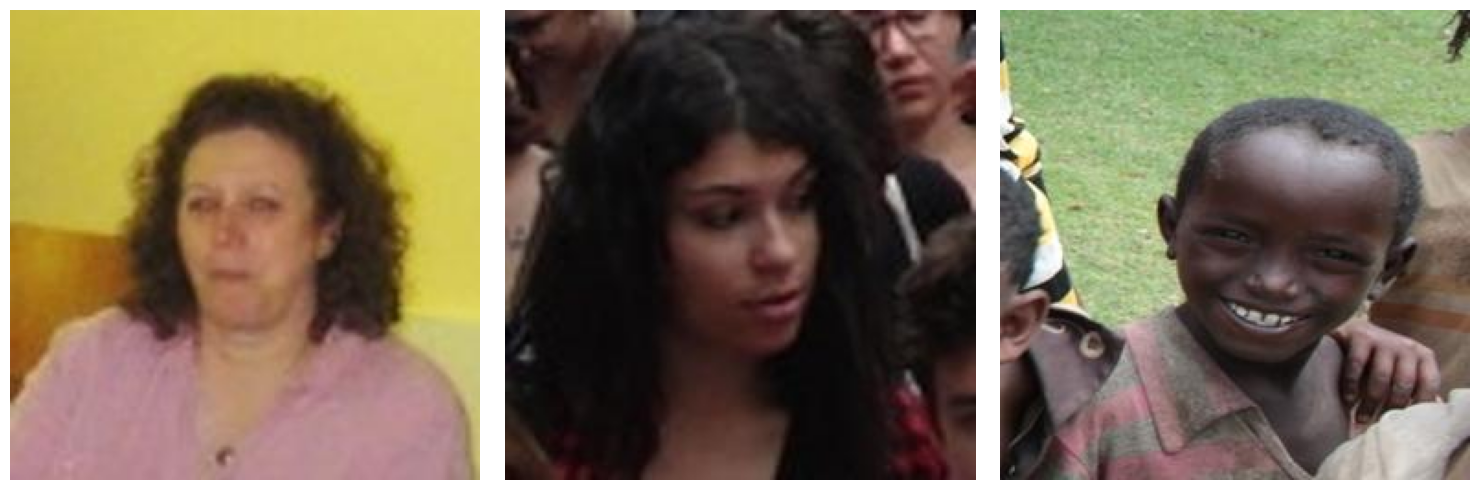

In [9]:
# Real Image Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create subplot grid
imgs = real['image'].head(3).values  # Get first 3 real images

for ax, img in zip(axes, imgs):
    image = plt.imread(os.path.join(root, 'Real', img))  # Load image
    ax.imshow(image)  # Display image
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

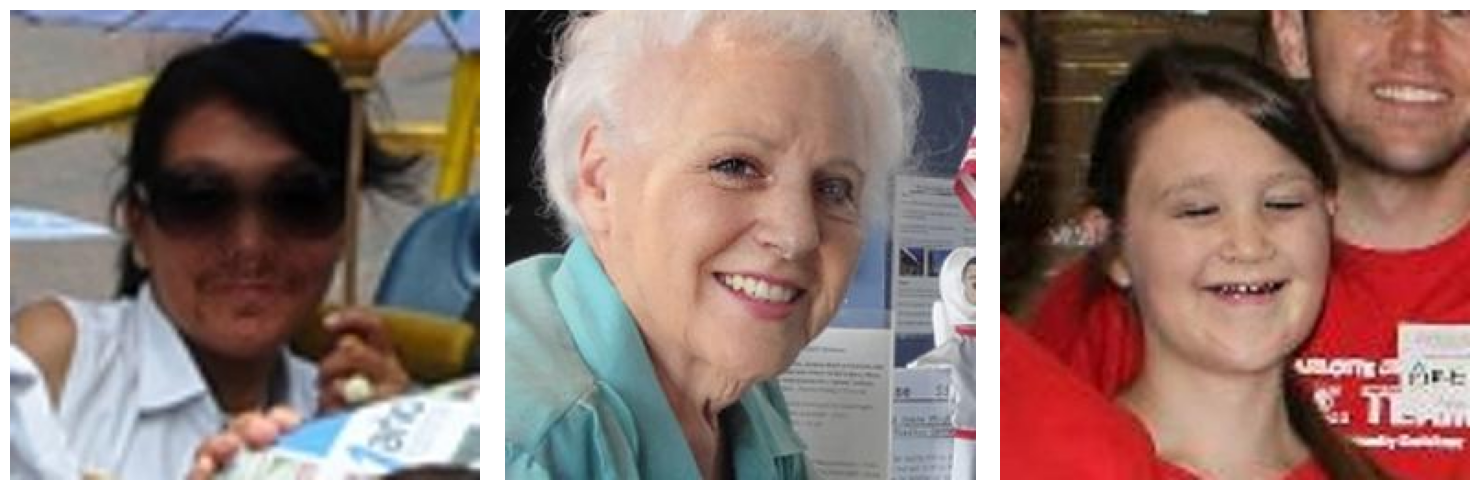

In [10]:
# Fake Image Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create subplot grid
imgs = fake['image'].head(3).values  # Get first 3 fake images

for ax, img in zip(axes, imgs):
    image = plt.imread(os.path.join(root, 'Fake', img))  # Load image
    ax.imshow(image)  # Display image
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

In [11]:
tempdf=df['class'].value_counts().reset_index()
fig=px.bar(tempdf, x='class' , y='count' ,color='class')
fig.show()

# PREPROCESSING

## CONVERTING IMAGE INTO ARRAY

In [12]:
# Load Images into Memory
image_list = []  # Store processed images
label_list = []  # Store corresponding labels

for folder in raw_classes:
    print(folder)
    for image in tqdm(df[df['class'] == folder]['image'], desc=f"Loading {folder}"):
        image_path = f'/kaggle/input/deepfake-and-real-images/Dataset/Train/{folder}/{image}'  # Build full path
        image = load_image_array(image_path)  # Process image to array
        image_list.append(image)  # Add to image list
        label_list.append(folder)  # Add corresponding label

Fake


Loading Fake: 100%|██████████| 10000/10000 [01:05<00:00, 153.79it/s]


Real


Loading Real: 100%|██████████| 10000/10000 [01:06<00:00, 150.18it/s]


In [13]:
# Data Verification
print(len(image_list))  # Check total images loaded
print(len(label_list))  # Check total labels loaded

20000
20000


## LABLEL ENCODING

In [14]:

# Binary Label Encoding
class_labels = LabelBinarizer()  # Initialize label encoder
labels = class_labels.fit_transform(label_list)  # Convert text labels to binary
os.makedirs('/kaggle/working/model', exist_ok=True)  # Create model directory in current location
pickle.dump(class_labels,open('/kaggle/working/model/label_transform.pkl', 'wb'))  # Save encoder for later use
cls = len(class_labels.classes_)  # Get number of classes
print(class_labels.classes_)  # Display class names

# Show Encoding Mapping
print("\nEncoding Mapping:")
for i, class_name in enumerate(class_labels.classes_):
    binary_code = [0] * len(class_labels.classes_)
    binary_code[i] = 1
    print(f"'{class_name}' → {binary_code}")

['Fake' 'Real']

Encoding Mapping:
'Fake' → [1, 0]
'Real' → [0, 1]


## TRAIN TEST SPLIT

In [15]:
X = np.array(image_list)  # Convert image list to NumPy array
Y = np.array(labels)      # Convert labels list to NumPy array

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)  # Split into 90% train, 10% test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=1)  # Split train into 90% train, 10% val

print(X_train.shape)  # Shape of training images
print(X_test.shape)   # Shape of test images
print(X_val.shape)    # Shape of validation images
print(y_train.shape)  # Shape of training labels
print(y_test.shape)   # Shape of test labels
print(np.unique(y_val))  # Unique classes in validation labels


(16200, 128, 128, 3)
(2000, 128, 128, 3)
(1800, 128, 128, 3)
(16200, 1)
(2000, 1)
[0 1]


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator()

In [17]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Model Training 

In [18]:
inputShape = (image_size, image_size, 3)  # Input shape for CNN: (height, width, color channels)

## CNN

In [19]:
num_classes = cls# Number of output classes
depth = 3# Number of input channels (e.g., RGB = 3)

model = Sequential()# Initialize sequential model

inputShape = (image_size, image_size, depth)  # Define input shape

# First Convolutional Block
model.add(Conv2D(128, (3, 3), padding="same", input_shape=inputShape))  # Conv layer with 128 filters
model.add(Activation("relu"))# ReLU activation
model.add(BatchNormalization())# Normalize activations
model.add(MaxPooling2D(pool_size=(3, 3))) # Downsample feature maps
model.add(Dropout(0.25))# Dropout to prevent overfitting

# Second Convolutional Block
model.add(Conv2D(128, (3, 3), padding="same")) 
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layers
model.add(Flatten())# Flatten feature maps into 1D vector
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))# Increased dropout for FC layer

# Output Layer
model.add(Dense(1))# Single output unit (binary classification)
model.add(Activation("sigmoid"))# Sigmoid for binary classification

model.summary()# Print model architecture


I0000 00:00:1750844842.600296      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750844842.601003      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 42, 42, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 42, 42, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 42, 42, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 42, 42, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 42, 42, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12800)               │          51,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 364,289 (1.39 MB)

 Trainable params: 337,921 (1.29 MB)

 Non-trainable params: 26,368 (103.00 KB)

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# Early stopping to prevent overfitting by monitoring validation accuracy
early_stopping = EarlyStopping(
    monitor='val_accuracy', # Monitor validation accuracy
    patience=10, # Stop training if no improvement for 5 epochs
    restore_best_weights=True, # Restore model weights from the best epoch
    verbose=1  # Print messages when stopping
)


In [23]:
# history = model.fit(
#     X_train, y_train, # Training data and labels
#     batch_size=32,# Number of samples per gradient update
#     epochs=10, # Total number of training epochs
#     validation_data=(X_val, y_val), # Validation data for monitoring
#     callbacks=[early_stopping], # Callback for early stopping
#     verbose=1  # Verbosity mode (1 = progress bar)
# )

history =model.fit(
    train_generator,
    validation_data=test_generator,
     callbacks=[early_stopping],
    epochs=10,
     verbose=1
)


Epoch 1/10


I0000 00:00:1750844899.858845     112 service.cc:148] XLA service 0x7848f8014330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750844899.860218     112 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750844899.860245     112 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750844900.450916     112 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/507 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.4922 - loss: 1.0053   

I0000 00:00:1750844907.334073     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


507/507 ━━━━━━━━━━━━━━━━━━━━ 83s 140ms/step - accuracy: 0.5601 - loss: 1.0629 - val_accuracy: 0.6075 - val_loss: 0.9990
Epoch 2/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 63s 124ms/step - accuracy: 0.5885 - loss: 1.1148 - val_accuracy: 0.6700 - val_loss: 0.7711
Epoch 3/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 64s 125ms/step - accuracy: 0.6045 - loss: 1.0988 - val_accuracy: 0.5165 - val_loss: 1.8363
Epoch 4/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 64s 126ms/step - accuracy: 0.6172 - loss: 1.0999 - val_accuracy: 0.6475 - val_loss: 0.8583
Epoch 5/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 63s 125ms/step - accuracy: 0.6218 - loss: 1.0649 - val_accuracy: 0.6135 - val_loss: 1.1004
Epoch 6/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 63s 125ms/step - accuracy: 0.6355 - loss: 1.0568 - val_accuracy: 0.5985 - val_loss: 1.4291
Epoch 7/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 63s 124ms/step - accuracy: 0.6609 - loss: 0.9881 - val_accuracy: 0.7800 - val_loss: 0.5347
Epoch 8/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 63s 125ms/step - accuracy: 0.6923 - loss: 0.8915 - val

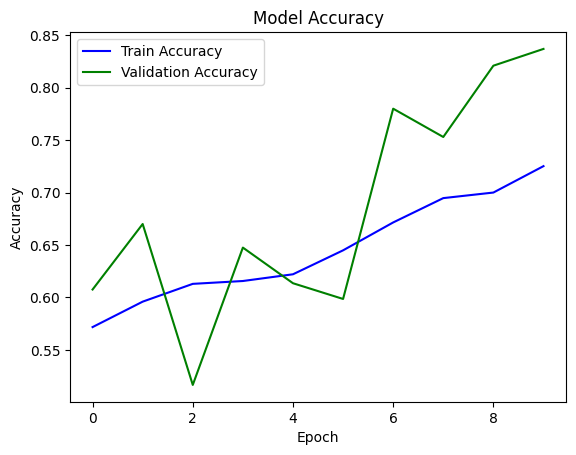

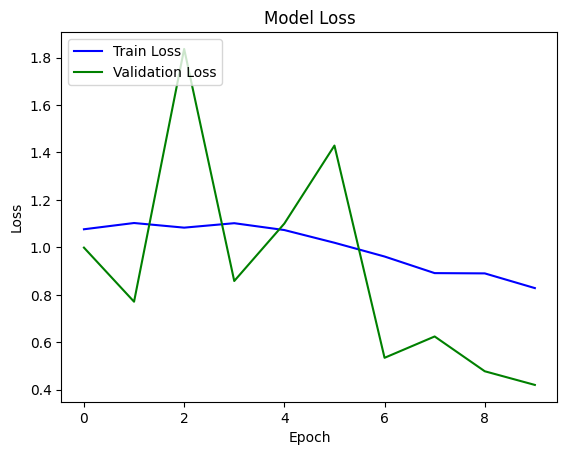

In [25]:
# Accuracy Plot
plt.plot(history.history['accuracy'], color='blue', linestyle='solid', label='Train Accuracy') # Training accuracy
plt.plot(history.history['val_accuracy'], color='green', linestyle='solid', label='Validation Accuracy') # Validation accuracy
plt.title('Model Accuracy')# Title of the plot
plt.ylabel('Accuracy')# Y-axis label
plt.xlabel('Epoch') # X-axis label
plt.legend(loc='upper left')# Legend position
plt.show()# Display the plot

# Loss Plot
plt.plot(history.history['loss'], color='blue', linestyle='solid', label='Train Loss')  # Training loss
plt.plot(history.history['val_loss'], color='green', linestyle='solid', label='Validation Loss')# Validation loss
plt.title('Model Loss') # Title of the plot
plt.ylabel('Loss')  # Y-axis label
plt.xlabel('Epoch')  # X-axis label
plt.legend(loc='upper left') # Legend position
plt.show() # Display the plot


In [27]:
pred = model.predict(test_generator)  # Predict probabilities on test set
y_pred = np.argmax(pred, axis=1) # Get predicted class labels from probabilities
y_test_org = y_test.flatten() # Flatten y_test in case it's multi-dimensional
y_pred = y_pred.flatten() # Flatten y_pred to match y_test shape


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


In [28]:
cnn = accuracy_score(y_test_org, y_pred) # Compute accuracy score
print("Accuracy Score: ", cnn)  # Print the accuracy


Accuracy Score:  0.5


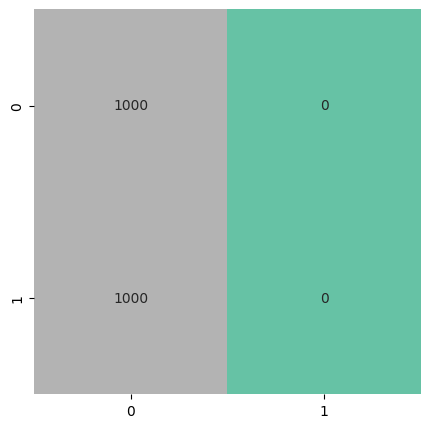

In [29]:
cm = confusion_matrix(y_test_org,y_pred)  # Compute confusion matrix
plt.figure(figsize=(5,5))  # Set figure size
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Set2')  # Plot heatmap with annotations
plt.show()  # Display the plot


In [30]:
print(classification_report(y_test_org,y_pred))  # Print precision, recall, f1-score, and support

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1000
           1       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



## Mobilenet

In [34]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
mobilenetV2 = MobileNetV2(input_shape=inputShape,include_top=False,weights='imagenet')

average_layer = GlobalAveragePooling2D()

model1 = Sequential([
    mobilenetV2,
    average_layer,
    Dense(256, activation=tf.nn.relu),
    BatchNormalization(),
    Dropout(0.2),
    Dense(2, activation=tf.nn.softmax)
])

In [35]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
history1 =model1.fit(
    train_generator,
    validation_data=test_generator,
     callbacks=[early_stopping],
    epochs=10,
     verbose=1
)

Epoch 1/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 129s 154ms/step - accuracy: 0.8244 - loss: 0.4739 - val_accuracy: 0.9120 - val_loss: 0.4101
Epoch 2/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 58s 115ms/step - accuracy: 0.9272 - loss: 0.1860 - val_accuracy: 0.9135 - val_loss: 0.5432
Epoch 3/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 58s 115ms/step - accuracy: 0.9397 - loss: 0.1560 - val_accuracy: 0.9380 - val_loss: 0.2561
Epoch 4/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 57s 113ms/step - accuracy: 0.9400 - loss: 0.1477 - val_accuracy: 0.9195 - val_loss: 0.2937
Epoch 5/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 58s 114ms/step - accuracy: 0.9518 - loss: 0.1238 - val_accuracy: 0.9405 - val_loss: 0.4865
Epoch 6/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 59s 116ms/step - accuracy: 0.9593 - loss: 0.1095 - val_accuracy: 0.7895 - val_loss: 1.5482
Epoch 7/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 59s 116ms/step - accuracy: 0.9542 - loss: 0.1173 - val_accuracy: 0.7330 - val_loss: 1.5777
Epoch 8/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 58s 114ms/step - accuracy: 0.9560 - loss: 

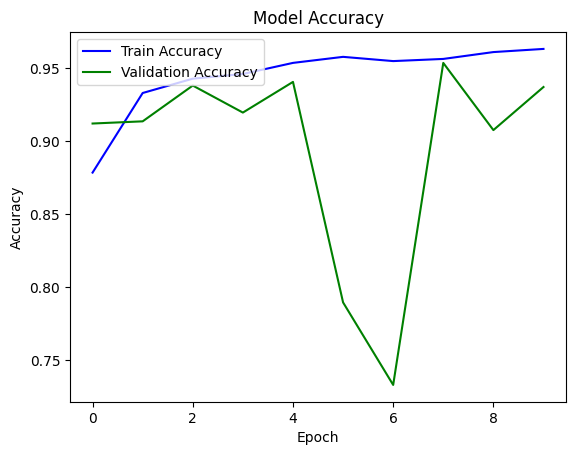

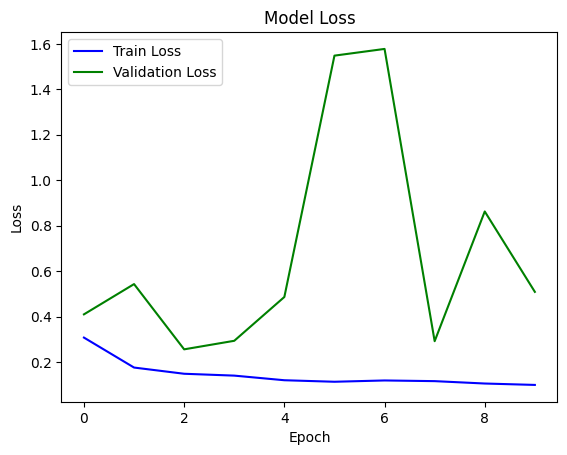

In [37]:
# Accuracy Plot
plt.plot(history1.history['accuracy'], color='blue', linestyle='solid', label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], color='green', linestyle='solid', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Loss Plot
plt.plot(history1.history['loss'], color='blue', linestyle='solid', label='Train Loss')
plt.plot(history1.history['val_loss'], color='green', linestyle='solid', label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [38]:
pred = model1.predict(test_generator)
y_pred = np.argmax(pred,axis=1)
y_test_org = y_test.flatten()
y_pred = y_pred.flatten()

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step


In [39]:
print("Accuracy Score: ", accuracy_score(y_test_org, y_pred))

Accuracy Score:  0.5095


In [40]:
moba= accuracy_score(y_test_org, y_pred)

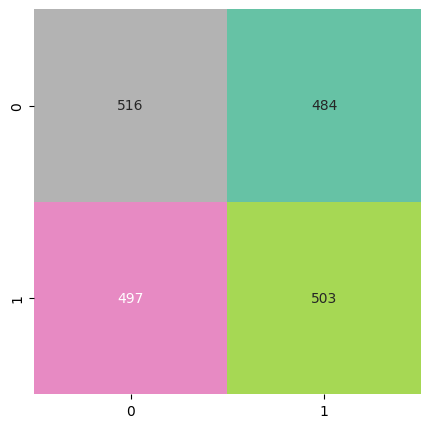

In [41]:
cm = confusion_matrix(y_test_org,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Set2')
plt.show()

In [42]:
print(classification_report(y_test_org,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51      1000
           1       0.51      0.50      0.51      1000

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



## VGG16

In [52]:
from tensorflow.keras.applications import VGG16, Xception
base_model = VGG16(weights='imagenet', include_top=False, input_shape=inputShape)

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
x = Dense(2, activation = 'softmax')(x)

model2 = Model(inputs=base_model.input, outputs=x)
model2.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │         524,352 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,239,170 (58.13 MB)

 Trainable params: 524,482 (2.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [54]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [55]:
history2 =model2.fit(
    train_generator,
    validation_data=test_generator,
     callbacks=[early_stopping],
    epochs=10,
     verbose=1
)

Epoch 1/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 82s 145ms/step - accuracy: 0.6641 - loss: 1.5025 - val_accuracy: 0.7730 - val_loss: 0.4847
Epoch 2/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 67s 132ms/step - accuracy: 0.7609 - loss: 0.4876 - val_accuracy: 0.7860 - val_loss: 0.4471
Epoch 3/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 66s 131ms/step - accuracy: 0.7760 - loss: 0.4672 - val_accuracy: 0.7915 - val_loss: 0.4533
Epoch 4/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 67s 132ms/step - accuracy: 0.7754 - loss: 0.4636 - val_accuracy: 0.7955 - val_loss: 0.4344
Epoch 5/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 67s 132ms/step - accuracy: 0.7791 - loss: 0.4494 - val_accuracy: 0.7860 - val_loss: 0.4433
Epoch 6/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 67s 131ms/step - accuracy: 0.7936 - loss: 0.4347 - val_accuracy: 0.8030 - val_loss: 0.4235
Epoch 7/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 66s 130ms/step - accuracy: 0.7889 - loss: 0.4418 - val_accuracy: 0.8065 - val_loss: 0.4271
Epoch 8/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 68s 134ms/step - accuracy: 0.7838 - loss: 0

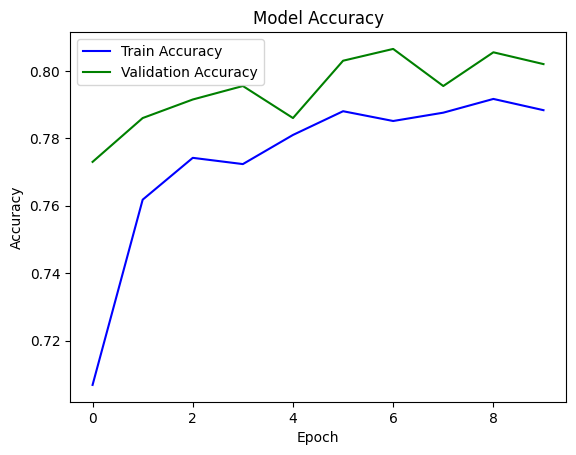

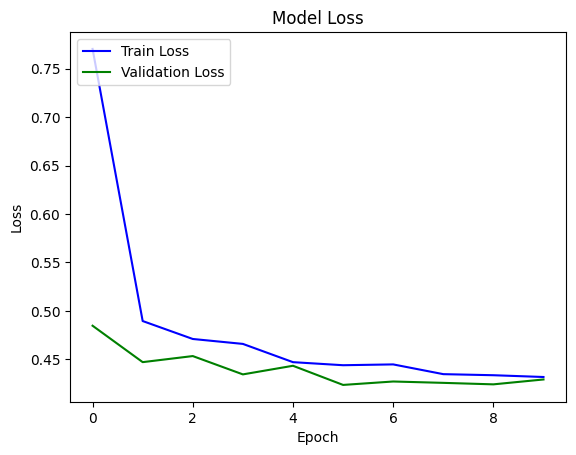

In [56]:
# Accuracy Plot
plt.plot(history2.history['accuracy'], color='blue', linestyle='solid', label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], color='green', linestyle='solid', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Loss Plot
plt.plot(history2.history['loss'], color='blue', linestyle='solid', label='Train Loss')
plt.plot(history2.history['val_loss'], color='green', linestyle='solid', label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [57]:
pred = model2.predict(test_generator)
y_pred = np.argmax(pred,axis=1)
y_test_org = y_test.flatten()
y_pred = y_pred.flatten()

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step


In [58]:
print("Accuracy Score: ", accuracy_score(y_test_org, y_pred))

Accuracy Score:  0.5135


In [59]:
vgg = accuracy_score(y_test_org, y_pred)

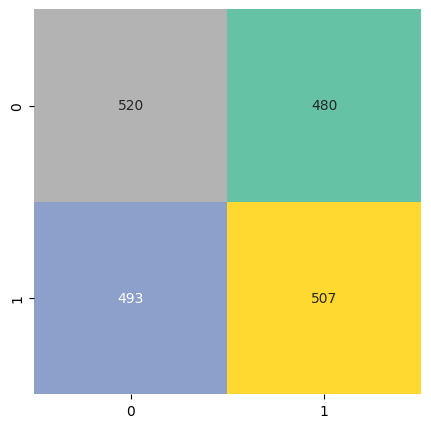

In [60]:
cm = confusion_matrix(y_test_org,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Set2')
plt.show()

In [61]:
print(classification_report(y_test_org,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.52      0.52      1000
           1       0.51      0.51      0.51      1000

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



## Exception

In [43]:
# Xception Backbone
xception = Xception(input_shape=(image_size,image_size,3), weights='imagenet', include_top=False)

# Freeze the model weights
xception.trainable = True

# The Xception Model baseline
model3 = Sequential([
    xception,
    GlobalAveragePooling2D(),
    Dropout(0.55),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
model3.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 4, 4, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │          65,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,927,114 (79.83 MB)

 Trainable params: 20,872,586 (79.62 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [44]:
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [45]:
history3 =model3.fit(
    train_generator,
    validation_data=test_generator,
     callbacks=[early_stopping],
    epochs=10,
     verbose=1
)

Epoch 1/10


E0000 00:00:1750857239.446840     108 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750857239.594857     108 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750857239.740547     108 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750857240.164021     108 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750857240.299476     108 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


389/507 ━━━━━━━━━━━━━━━━━━━━ 16s 143ms/step - accuracy: 0.8025 - loss: 0.4171

E0000 00:00:1750857310.323646     108 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750857310.460801     108 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


507/507 ━━━━━━━━━━━━━━━━━━━━ 149s 189ms/step - accuracy: 0.8207 - loss: 0.3863 - val_accuracy: 0.8915 - val_loss: 0.3028
Epoch 2/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 79s 155ms/step - accuracy: 0.9385 - loss: 0.1606 - val_accuracy: 0.9160 - val_loss: 0.2236
Epoch 3/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 81s 159ms/step - accuracy: 0.9501 - loss: 0.1313 - val_accuracy: 0.9420 - val_loss: 0.2002
Epoch 4/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 82s 161ms/step - accuracy: 0.9591 - loss: 0.1119 - val_accuracy: 0.8400 - val_loss: 0.4717
Epoch 5/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 82s 162ms/step - accuracy: 0.9598 - loss: 0.1050 - val_accuracy: 0.9650 - val_loss: 0.1091
Epoch 6/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 82s 162ms/step - accuracy: 0.9642 - loss: 0.0955 - val_accuracy: 0.9510 - val_loss: 0.1524
Epoch 7/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 83s 163ms/step - accuracy: 0.9666 - loss: 0.0879 - val_accuracy: 0.8430 - val_loss: 0.5153
Epoch 8/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 83s 164ms/step - accuracy: 0.9724 - loss: 0.0738 - va

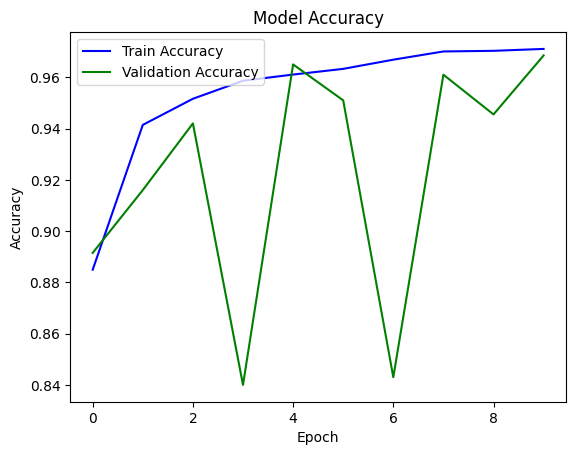

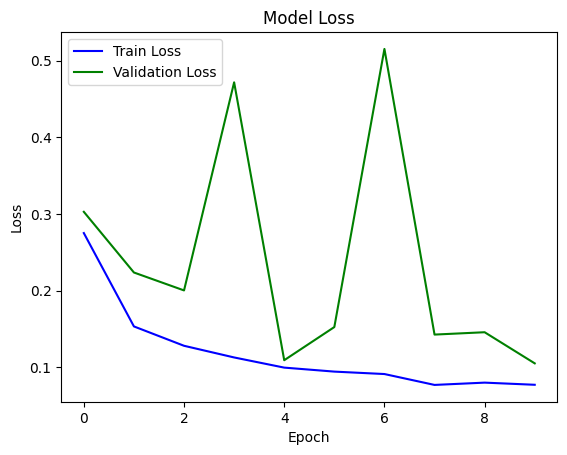

In [46]:
# Accuracy Plot
plt.plot(history3.history['accuracy'], color='blue', linestyle='solid', label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], color='green', linestyle='solid', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Loss Plot
plt.plot(history3.history['loss'], color='blue', linestyle='solid', label='Train Loss')
plt.plot(history3.history['val_loss'], color='green', linestyle='solid', label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [47]:
pred = model3.predict(test_generator)
y_pred = np.argmax(pred,axis=1)
y_test_org = y_test.flatten()
y_pred = y_pred.flatten()

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step


In [48]:
print("Accuracy Score: ", accuracy_score(y_test_org, y_pred))

Accuracy Score:  0.5045


In [49]:
excep = accuracy_score(y_test_org, y_pred)

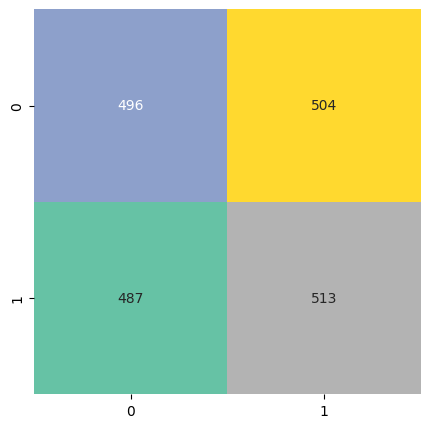

In [50]:
cm = confusion_matrix(y_test_org,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Set2')
plt.show()

In [51]:
print(classification_report(y_test_org,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1000
           1       0.50      0.51      0.51      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



## PLAIN EFFICIENT

In [52]:

from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import EarlyStopping
base_model = EfficientNetB2( include_top=False, weights='imagenet', input_shape=inputShape)
model4 = base_model.output
model4= GlobalAveragePooling2D()(model4)
model4=Dropout(0.3)(model4)
model4 = Dense(128, activation='relu')(model4)
model4 = Dropout(0.2)(model4)
model4 = Dense(2, activation='softmax')(model4)
model4 = Model(inputs = base_model.input, outputs=model4)
model4.summary()

31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 128, 128, 3)    │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 128, 128, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 129, 129, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 64, 64, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 64, 64, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 64, 64, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 64, 64, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 64, 64, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 64, 64, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 7,949,179 (30.32 MB)

 Trainable params: 7,881,604 (30.07 MB)

 Non-trainable params: 67,575 (263.97 KB)

In [53]:
model4.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [54]:
history4 =model4.fit(
    train_generator,
    validation_data=test_generator,
     callbacks=[early_stopping],
    epochs=10,
     verbose=1
)

Epoch 1/10


E0000 00:00:1750858185.239771     109 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750858185.374793     109 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750858185.793021     109 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750858185.931335     109 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


435/507 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.8258 - loss: 0.3806

E0000 00:00:1750858277.856049     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750858277.992648     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


507/507 ━━━━━━━━━━━━━━━━━━━━ 236s 228ms/step - accuracy: 0.8347 - loss: 0.3650 - val_accuracy: 0.8655 - val_loss: 0.2984
Epoch 2/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 60s 118ms/step - accuracy: 0.9439 - loss: 0.1576 - val_accuracy: 0.9175 - val_loss: 0.1963
Epoch 3/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 60s 118ms/step - accuracy: 0.9481 - loss: 0.1360 - val_accuracy: 0.9135 - val_loss: 0.2878
Epoch 4/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 60s 118ms/step - accuracy: 0.9552 - loss: 0.1195 - val_accuracy: 0.9590 - val_loss: 0.1246
Epoch 5/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 60s 118ms/step - accuracy: 0.9617 - loss: 0.1063 - val_accuracy: 0.9580 - val_loss: 0.1142
Epoch 6/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 60s 119ms/step - accuracy: 0.9652 - loss: 0.0920 - val_accuracy: 0.9450 - val_loss: 0.1440
Epoch 7/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 60s 119ms/step - accuracy: 0.9672 - loss: 0.0907 - val_accuracy: 0.9570 - val_loss: 0.1129
Epoch 8/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 60s 119ms/step - accuracy: 0.9708 - loss: 0.0779 - va

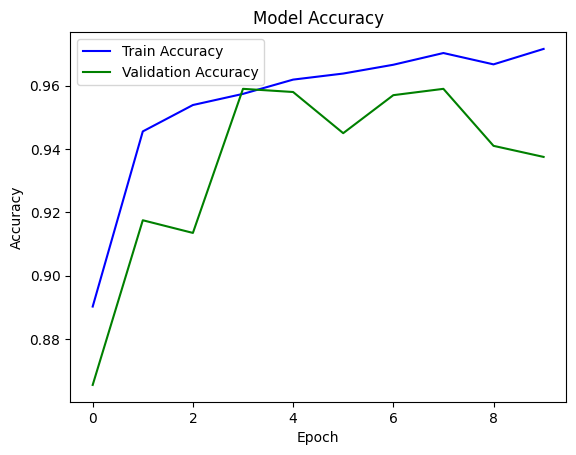

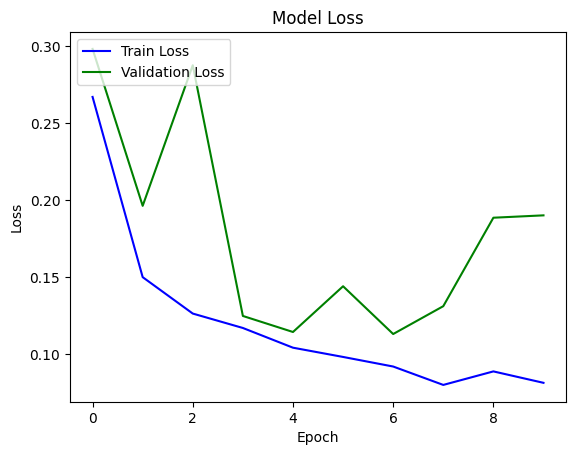

In [55]:
# Accuracy Plot
plt.plot(history4.history['accuracy'], color='blue', linestyle='solid', label='Train Accuracy')
plt.plot(history4.history['val_accuracy'], color='green', linestyle='solid', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Loss Plot
plt.plot(history4.history['loss'], color='blue', linestyle='solid', label='Train Loss')
plt.plot(history4.history['val_loss'], color='green', linestyle='solid', label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [56]:
pred = model4.predict(X_test)
y_pred = np.argmax(pred,axis=1)
y_test_org = y_test.flatten()
y_pred = y_pred.flatten()

63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step


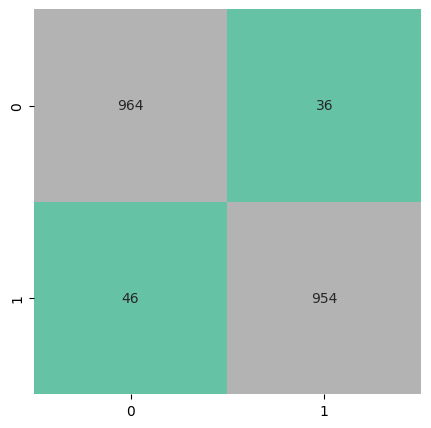

In [57]:
cm = confusion_matrix(y_test_org,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Set2')
plt.show()

In [58]:
eff = accuracy_score(y_test_org, y_pred)

In [59]:
print(classification_report(y_test_org,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1000
           1       0.96      0.95      0.96      1000

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [60]:
model1.save('/kaggle/working/my_model_plain.keras')
model1.save('/kaggle/working/my_model_plain.h5')

## Efficienet with attention

In [129]:
from tensorflow.keras import layers, models
from tensorflow.keras import layers, models, backend as K
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers, models, backend as K
from tensorflow.keras.applications import EfficientNetB7

# Set image size and input shape
# from tensorflow.keras.applications import EfficientNetB2
in_lay = Input(shape=(128,128,3))
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))


pt_features = base_model(in_lay)
bn_features = BatchNormalization()(pt_features)
pt_depth = base_model.output_shape[-1]

# here we do an attention mechanism to turn pixels in the GAP on an off
attn_layer = Conv2D(256, kernel_size = (1,1), padding = 'same', activation = 'relu')(Dropout(0.5)(bn_features))
attn_layer = Conv2D(128, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = Conv2D(128, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = Conv2D(1,
                    kernel_size = (1,1),
                    padding = 'valid',
                    activation = 'sigmoid')(attn_layer)
# fan it out to all of the channels
up_c2 = Conv2D(
    pt_depth,
    kernel_size=(1, 1),
    padding='same',
    activation='linear',
    use_bias=False
)

# Set weights afterward
up_c2_w = np.ones((1, 1, 1, pt_depth), dtype=np.float32)
up_c2.build((None, None, None, 1))  # Must build the layer to set weights
up_c2.set_weights([up_c2_w])

# Make it non-trainable
up_c2.trainable = True

# Apply the attention mask expansion
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)
# to account for missing values from the attention model
gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.25)(gap)
dr_steps = Dropout(0.25)(Dense(256, activation = 'relu')(gap_dr))
out_layer = Dense(2, activation = 'softmax')(dr_steps)
model5 = Model(inputs = [in_lay], outputs = [out_layer])
model5.summary()


Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21            │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ efficientnetb7            │ (None, 4, 4, 2560)     │     64,097,687 │ input_layer_21[0][0]   │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_21    │ (None, 4, 4, 2560)     │         10,240 │ efficientnetb7[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_18 (Dropout)      │ (None, 4, 4, 2560)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 4, 4, 256)      │        655,616 │ dropout_18[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 4, 4, 128)      │         32,896 │ conv2d_20[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 4, 4, 128)      │         16,512 │ conv2d_21[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 4, 4, 1)        │            129 │ conv2d_22[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 4, 4, 2560)     │          2,560 │ conv2d_23[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_1 (Multiply)     │ (None, 4, 4, 2560)     │              0 │ conv2d_24[0][0],       │
│                           │                        │                │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2560)           │              0 │ multiply_1[0][0]       │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2560)           │              0 │ conv2d_24[0][0]        │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ RescaleGAP (Lambda)       │ (None, 2560)           │              0 │ global_average_poolin… │
│                           │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_19 (Dropout)      │ (None, 2560)           │              0 │ RescaleGAP[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 256)            │        655,616 │ dropout_19[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_20 (Dropout)      │ (None, 256)            │              0 │ dense_23[0][0]         │
├──────────────────────

 Total params: 65,471,770 (249.75 MB)

 Trainable params: 65,155,923 (248.55 MB)

 Non-trainable params: 315,847 (1.20 MB)

In [84]:
model5.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [85]:
history5 =model5.fit(
    train_generator,
    validation_data=test_generator,
     callbacks=[early_stopping],
    epochs=10,
     verbose=1
)

Epoch 1/10


E0000 00:00:1750850681.155592     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750850681.293807     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750850681.624101     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750850681.762386     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750850682.145057     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

397/507 ━━━━━━━━━━━━━━━━━━━━ 35s 325ms/step - accuracy: 0.7854 - loss: 0.4638

E0000 00:00:1750850913.142913     112 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750850913.302522     112 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


507/507 ━━━━━━━━━━━━━━━━━━━━ 609s 588ms/step - accuracy: 0.8033 - loss: 0.4307 - val_accuracy: 0.9540 - val_loss: 0.1323
Epoch 2/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 170s 336ms/step - accuracy: 0.9412 - loss: 0.1627 - val_accuracy: 0.9560 - val_loss: 0.1185
Epoch 3/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 169s 334ms/step - accuracy: 0.9432 - loss: 0.1465 - val_accuracy: 0.9460 - val_loss: 0.1928
Epoch 4/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 169s 334ms/step - accuracy: 0.9553 - loss: 0.1244 - val_accuracy: 0.9465 - val_loss: nan
Epoch 5/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 170s 335ms/step - accuracy: 0.9639 - loss: 0.0981 - val_accuracy: 0.9600 - val_loss: nan
Epoch 6/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 169s 334ms/step - accuracy: 0.9680 - loss: 0.0890 - val_accuracy: 0.9420 - val_loss: nan
Epoch 7/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 169s 334ms/step - accuracy: 0.9707 - loss: 0.0841 - val_accuracy: 0.9285 - val_loss: 0.2627
Epoch 8/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 170s 334ms/step - accuracy: 0.9668 - loss: 0.0912 - val_

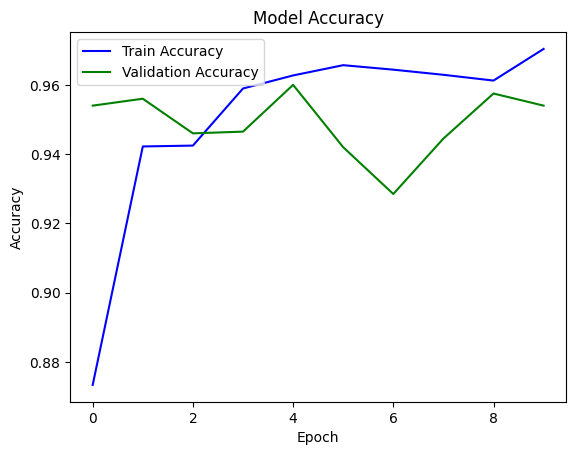

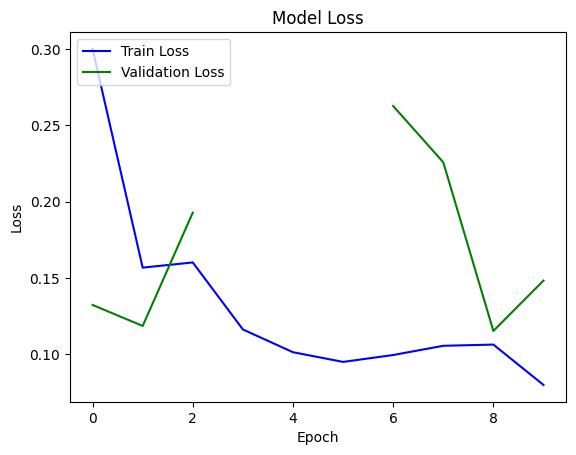

In [86]:
# Accuracy Plot
plt.plot(history5.history['accuracy'], color='blue', linestyle='solid', label='Train Accuracy')
plt.plot(history5.history['val_accuracy'], color='green', linestyle='solid', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Loss Plot
plt.plot(history5.history['loss'], color='blue', linestyle='solid', label='Train Loss')
plt.plot(history5.history['val_loss'], color='green', linestyle='solid', label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [87]:
pred = model5.predict(test_generator)
y_pred = np.argmax(pred,axis=1)
y_test_org = y_test.flatten()
y_pred = y_pred.flatten()

63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 406ms/step


In [88]:
print("Accuracy Score: ", accuracy_score(y_test_org, y_pred))

Accuracy Score:  0.5085


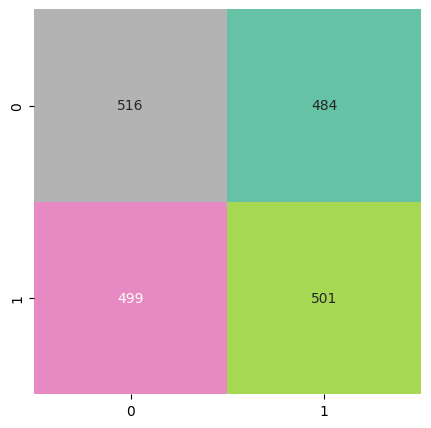

In [89]:
cm = confusion_matrix(y_test_org,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Set2')
plt.show()

In [90]:
eff_att= accuracy_score(y_test_org, y_pred)

In [91]:
print(classification_report(y_test_org,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51      1000
           1       0.51      0.50      0.50      1000

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



In [92]:
model.save('/kaggle/working/best_model_effatt.h5')
# model.export('/kaggle/working/my_model_savedmodel')
model.save('/kaggle/working/best_model_effatt.keras')
# model.save('/kaggle/working/my_model_new')

In [79]:
!zip -r /kaggle/working/my_model_new.zip /kaggle/working/my_model_new


	zip warning: name not matched: /kaggle/working/my_model_new

zip error: Nothing to do! (try: zip -r /kaggle/working/my_model_new.zip . -i /kaggle/working/my_model_new)


## TEST

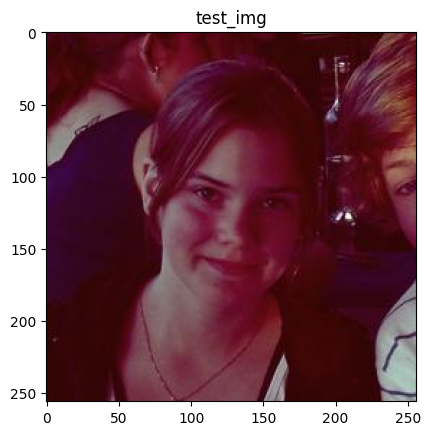

In [24]:
img='/kaggle/input/deepfake-and-real-images/Dataset/Test/Real/real_0.jpg'
test_img=plt.imread(img)
plt.imshow(test_img)
plt.title("test_img")
plt.show()

In [25]:
img=load_image_array(img)
print(img.ndim)
if img.ndim == 3:  
    img = np.expand_dims(img, axis=0) 
model12=load_model('/kaggle/working/my_model_plain.h5')
prediction=model12.predict(img)
answer=np.argmax(prediction)
print(answer)
answer=class_labels.inverse_transform(answer)
print(answer)

3


I0000 00:00:1750407413.740148    1939 service.cc:148] XLA service 0x7b195c059a20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750407413.746114    1939 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750407413.746153    1939 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1
['Real']


I0000 00:00:1750407420.784889    1939 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
